In [4]:
from kaa.reach import ReachSet
from kaa.plotutil import Plot
from kaa.trajectory import Traj
from models.vanderpol import VanDerPol, VanDerPol_UnitBox

from kaa.temp.pca_strat import PCAStrat, DelayedPCAStrat
from kaa.temp.lin_app_strat import LinStrat
from kaa.templates import MultiStrategy
from kaa.experiment import PhasePlotExperiment

from kaa.settings import PlotSettings, KaaSettings
from kaa.timer import Timer

KaaSettings.SuppressOutput = True
from IPython.display import Image


## Sapo Vs Kaa (Original Initial Set:  $ [[0,0.01],[1.97,2]]$

[(-0.0, 1.97), (-0.0, 2.0), (0.01, 1.97), (0.01, 2.0), (0.005, 1.97), (0.005, 2.0), (-0.0, 1.9849999999999999), (0.01, 1.9849999999999999)]


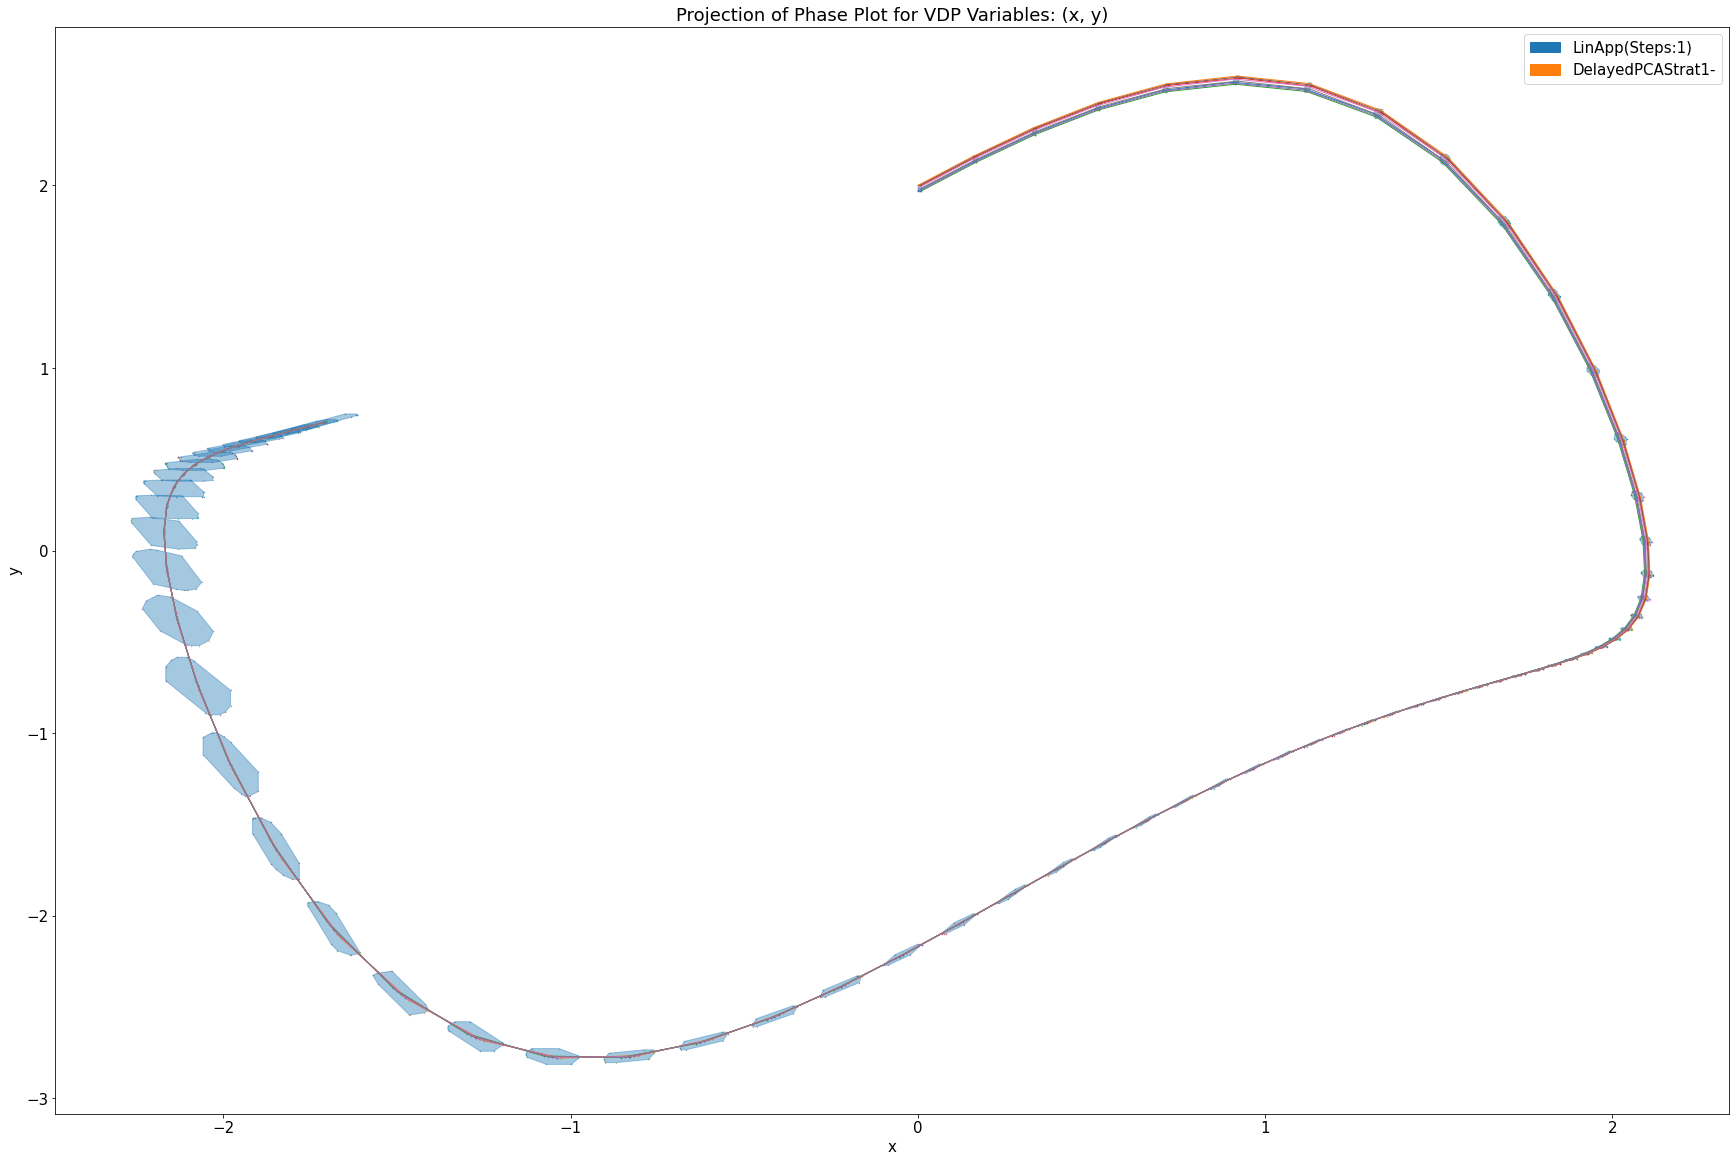

Plotting phase for dimensions x, y done -- Time Spent: 0.7981863021850586
Average Generator Procedure Duration: 0.00042103899794480995 sec
Average Functional Composition Duration: 0.007365393453735115 sec
Average Bound Computation Duration: 0.03237782742704806 sec
Average Reachable Set Computation Duration: 6.45225145476205 sec
Average Phase Duration: 0.7981863021850586 sec


In [2]:
NUM_STEPS = 70
VDP_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of LinApp Templates.
VDP_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
VDP_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
VDP_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.
#
VDP_PCA_LIFE_SPAN = 3

unit_model = VanDerPol_UnitBox(delta=0.08)

lin_strat = MultiStrategy(LinStrat(unit_model, iter_steps=VDP_LIN_ITER_STEPS), \
                          DelayedPCAStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, life_span=VDP_PCA_LIFE_SPAN))

vdp_pca = PhasePlotExperiment(unit_model, lin_strat)
vdp_pca.execute(NUM_STEPS)
vdp_pca.plot_results(0,1)

Timer.generate_stats()

[(-0.0, 1.97), (-0.0, 2.0), (0.01, 1.97), (0.01, 2.0), (0.005, 1.97), (0.005, 2.0), (-0.0, 1.9849999999999999), (0.01, 1.9849999999999999)]


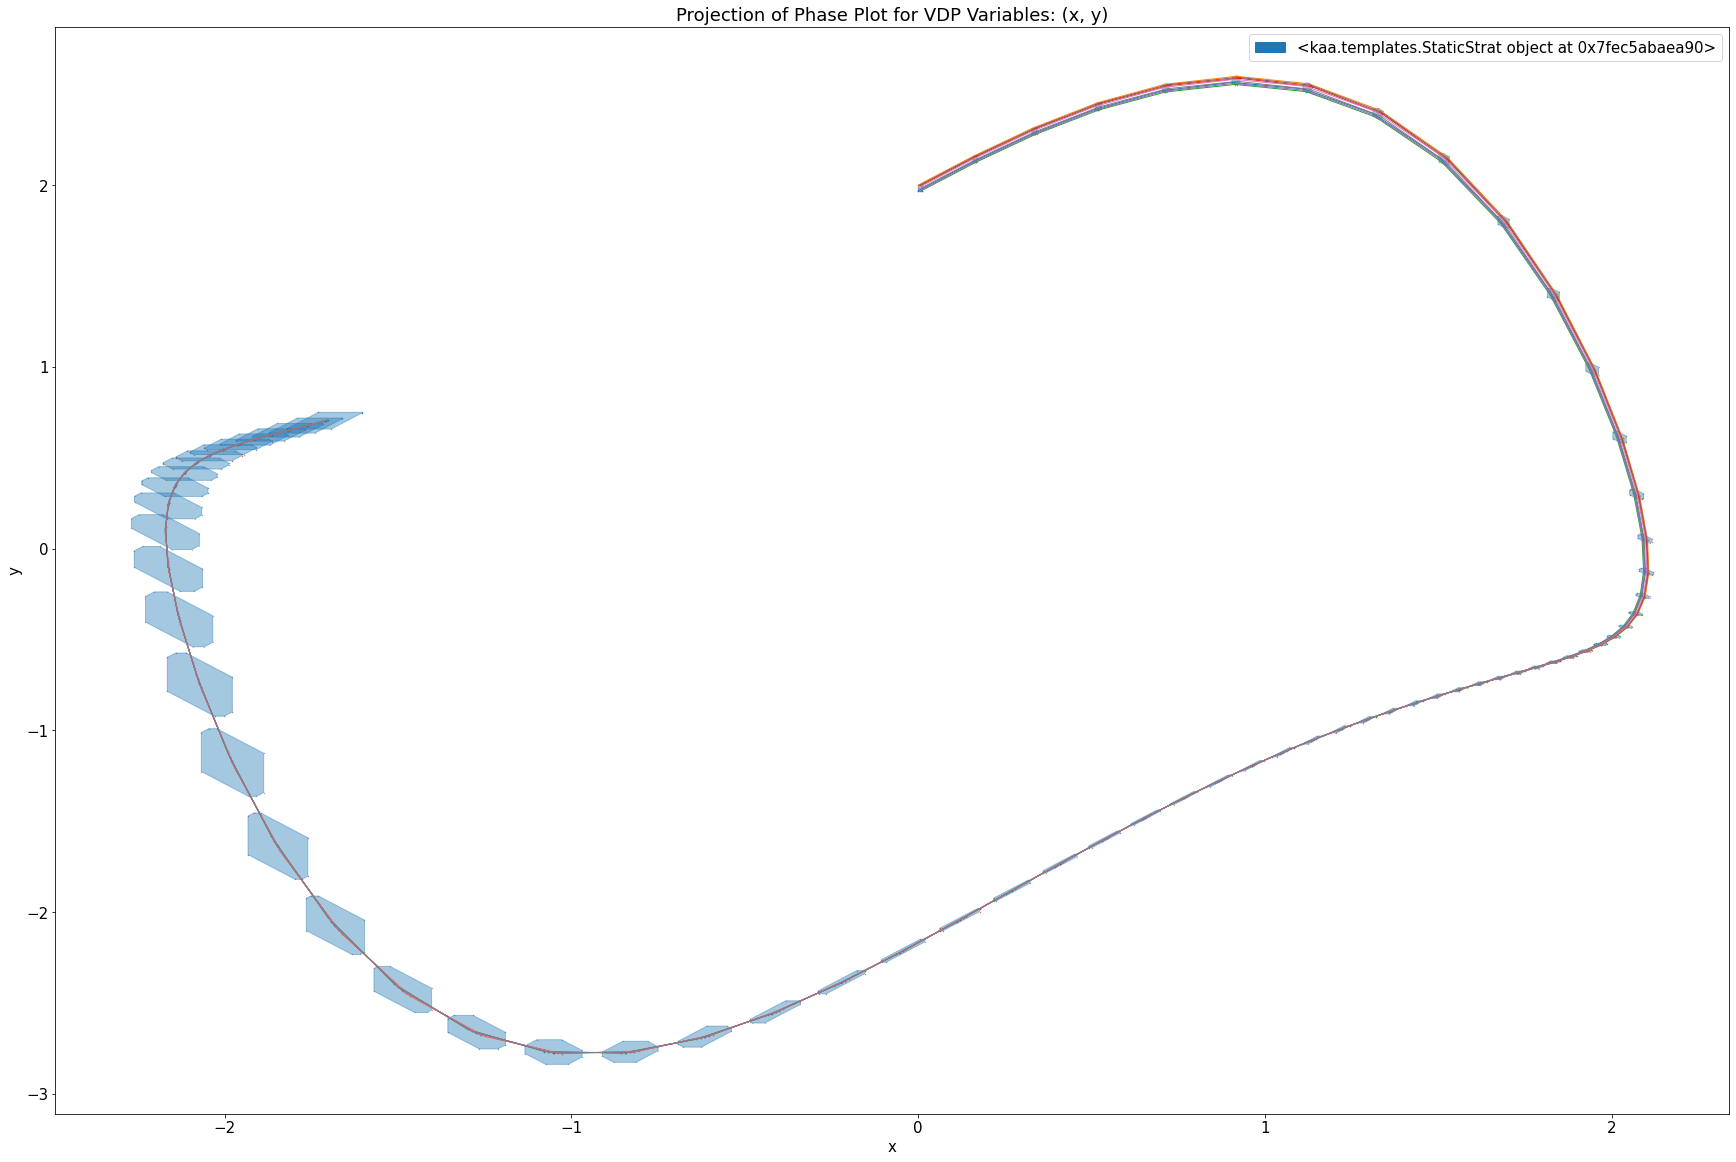

Plotting phase for dimensions x, y done -- Time Spent: 0.6810312271118164
Average Generator Procedure Duration: 0.00044401229892060206 sec
Average Functional Composition Duration: 0.007420103191163754 sec
Average Bound Computation Duration: 0.029083481870970124 sec
Average Reachable Set Computation Duration: 3.567230873448508 sec
Average Phase Duration: 0.7396087646484375 sec


In [3]:
NUM_STEPS = 70

model = VanDerPol(delta=0.08)
vdp_sapo = PhasePlotExperiment(model)
vdp_sapo.execute(NUM_STEPS)

vdp_sapo.plot_results(0,1)
Timer.generate_stats()


## Sapo vs Kaa with 3x larger initial set

$ [[0,0.03],[1.94,2]]$

### Sapo's plot

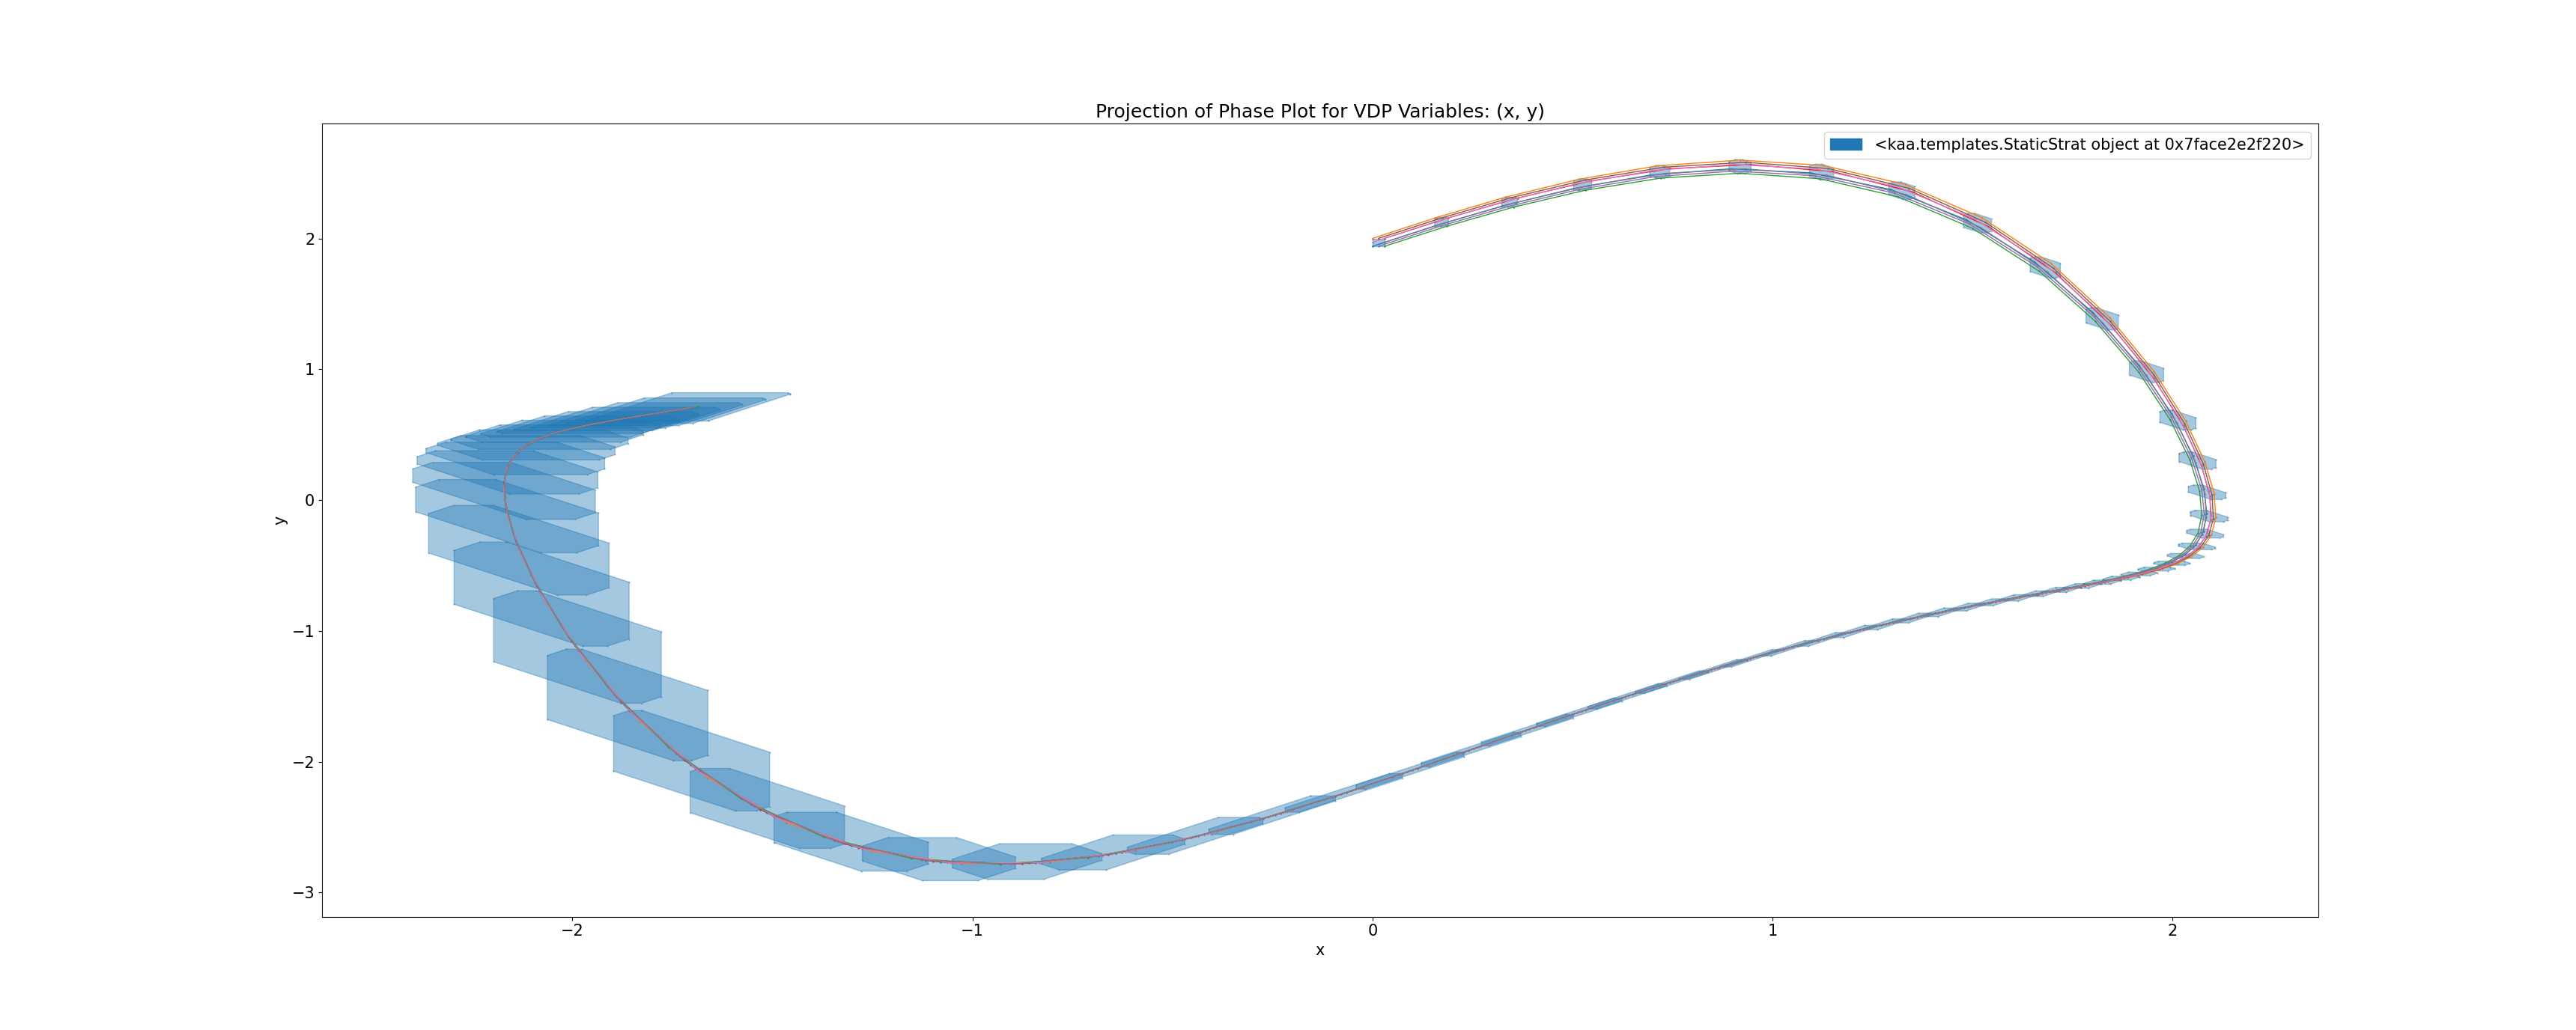

In [5]:
Image("figures/11:12:20/VDPSapo(3x).png")

### Kaa's plot (PCA template generated every step - alive for 3 steps)

This is the strategy where PCA templates are generated every time step, but each one only lives for 3 time steps after its creation. My guess as to why this doesn't make much of a difference involves their short lifespan.

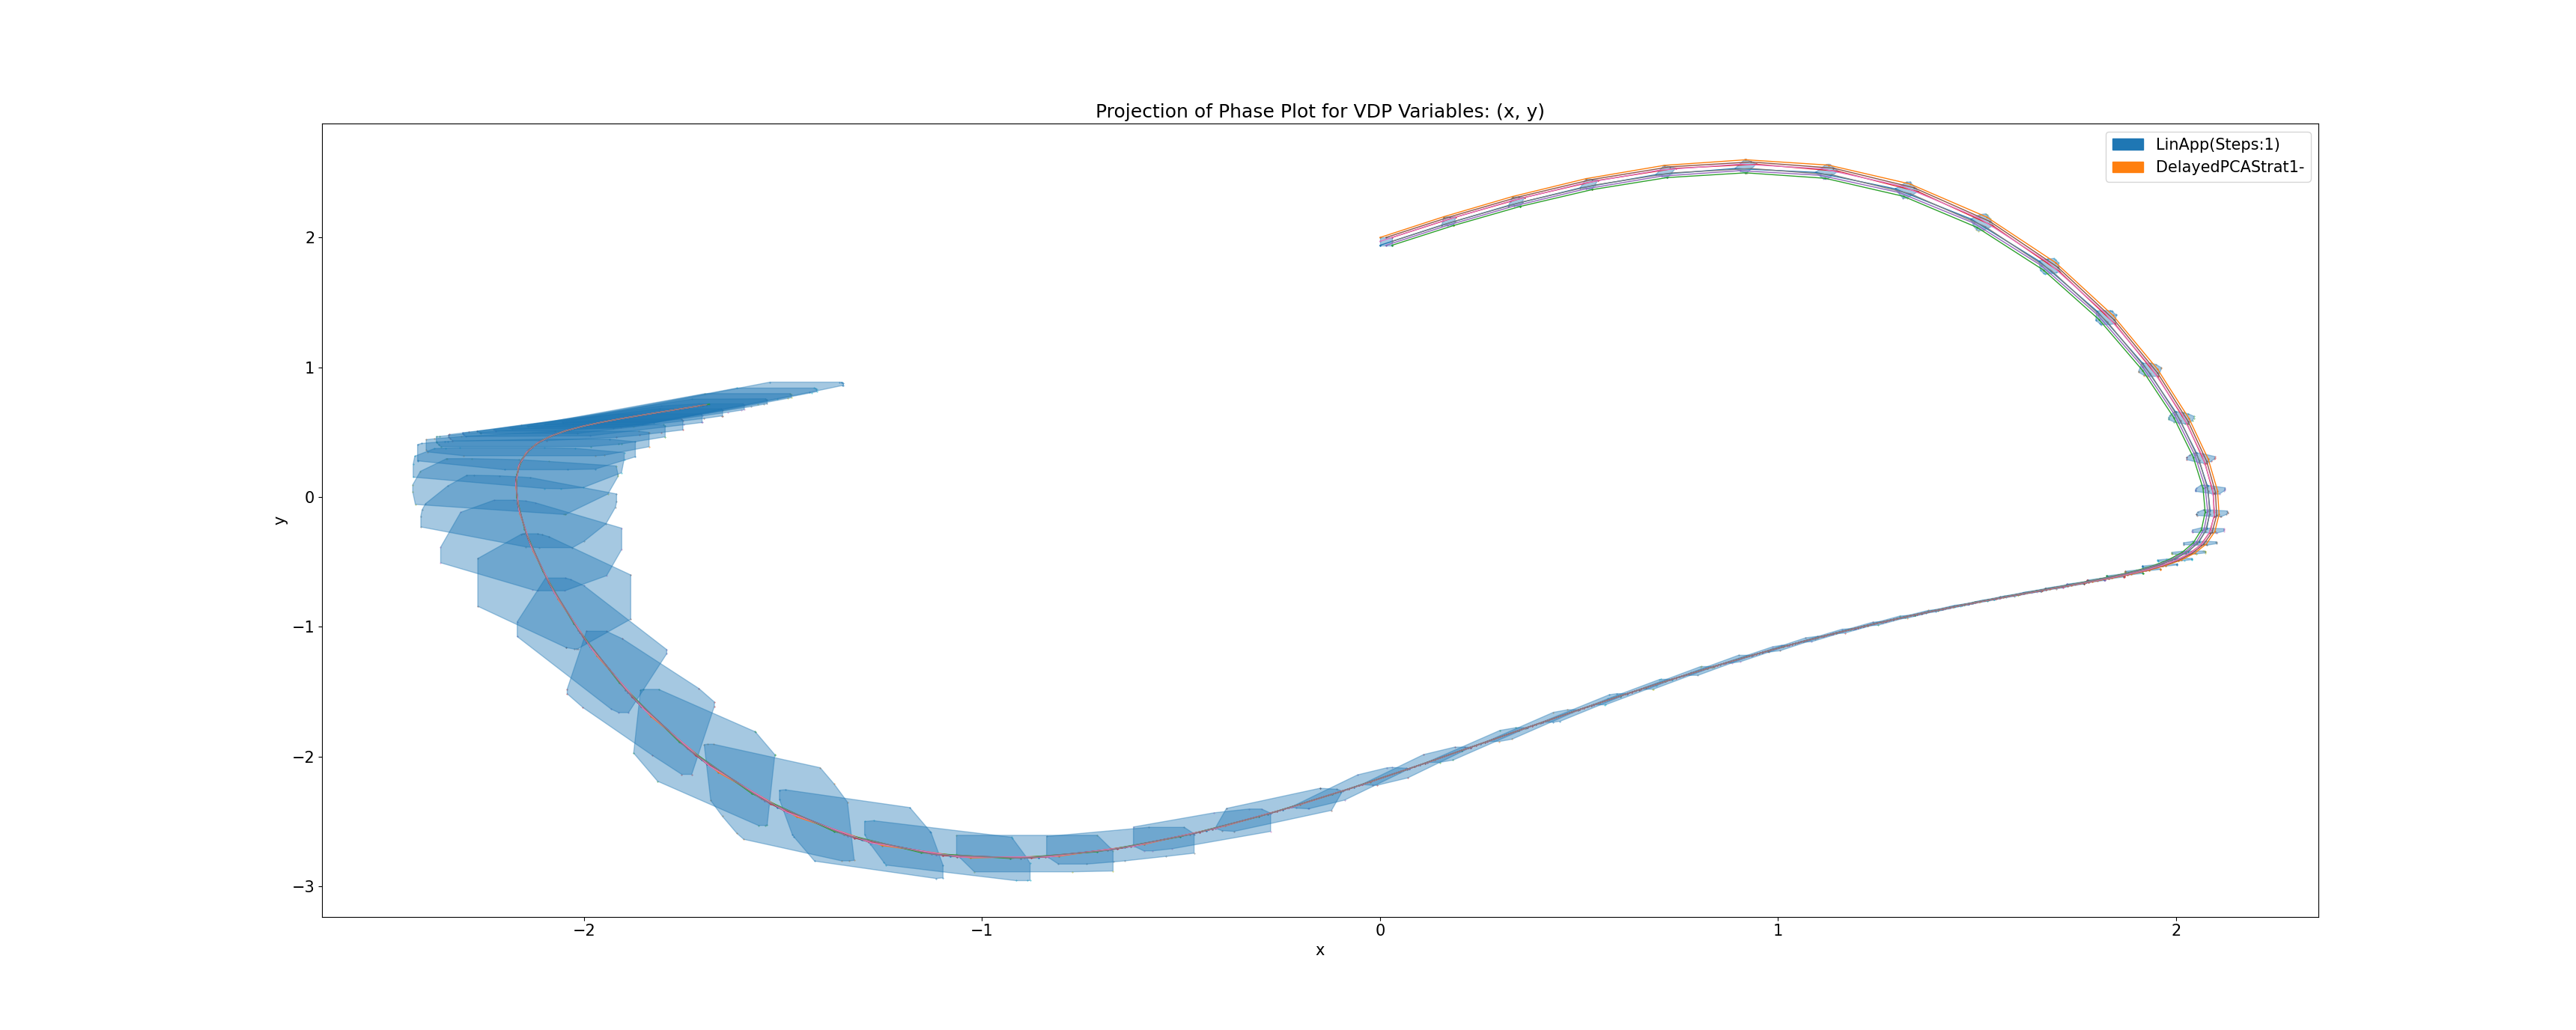

In [6]:
Image("figures/11:12:20/VDPDelay(3x).png")

### Kaa's plot (2 PCA templates - 5 steps apart)

This will be 4 templates in all. The box template, the linear app template reorienting every step, and 2 PCA templates
One reorienting every step and one reorienting every six steps.

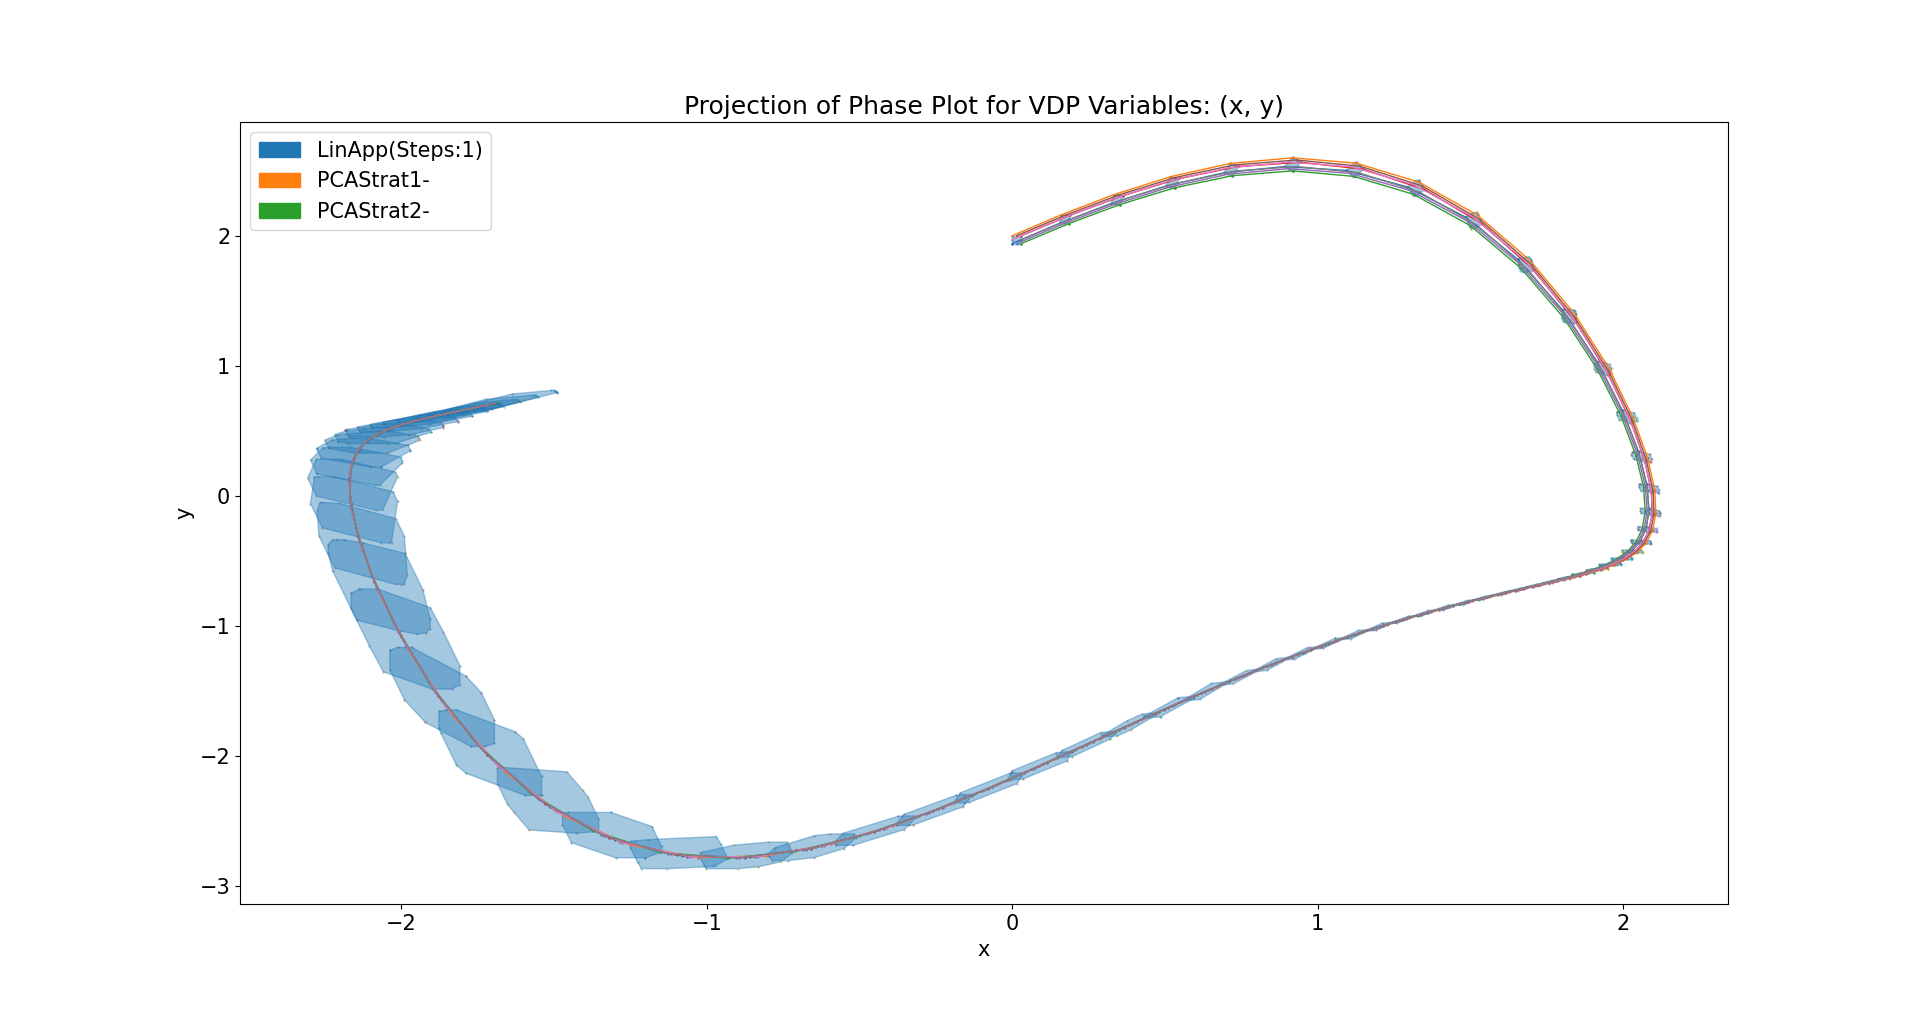

In [8]:

Image("figures/11:12:20/VDP(3x)(2PCA - 5 steps).png")

### Kaa's plot (2 PCA templates - 7 steps apart)

This will be 4 templates in all. The box template, the linear app template reorienting every step, and 2 PCA templates
One reorienting every step and one reorienting every 8 steps. There doesn't seem to be much of a difference between the 5 step gap and the seven step gap at a glance.

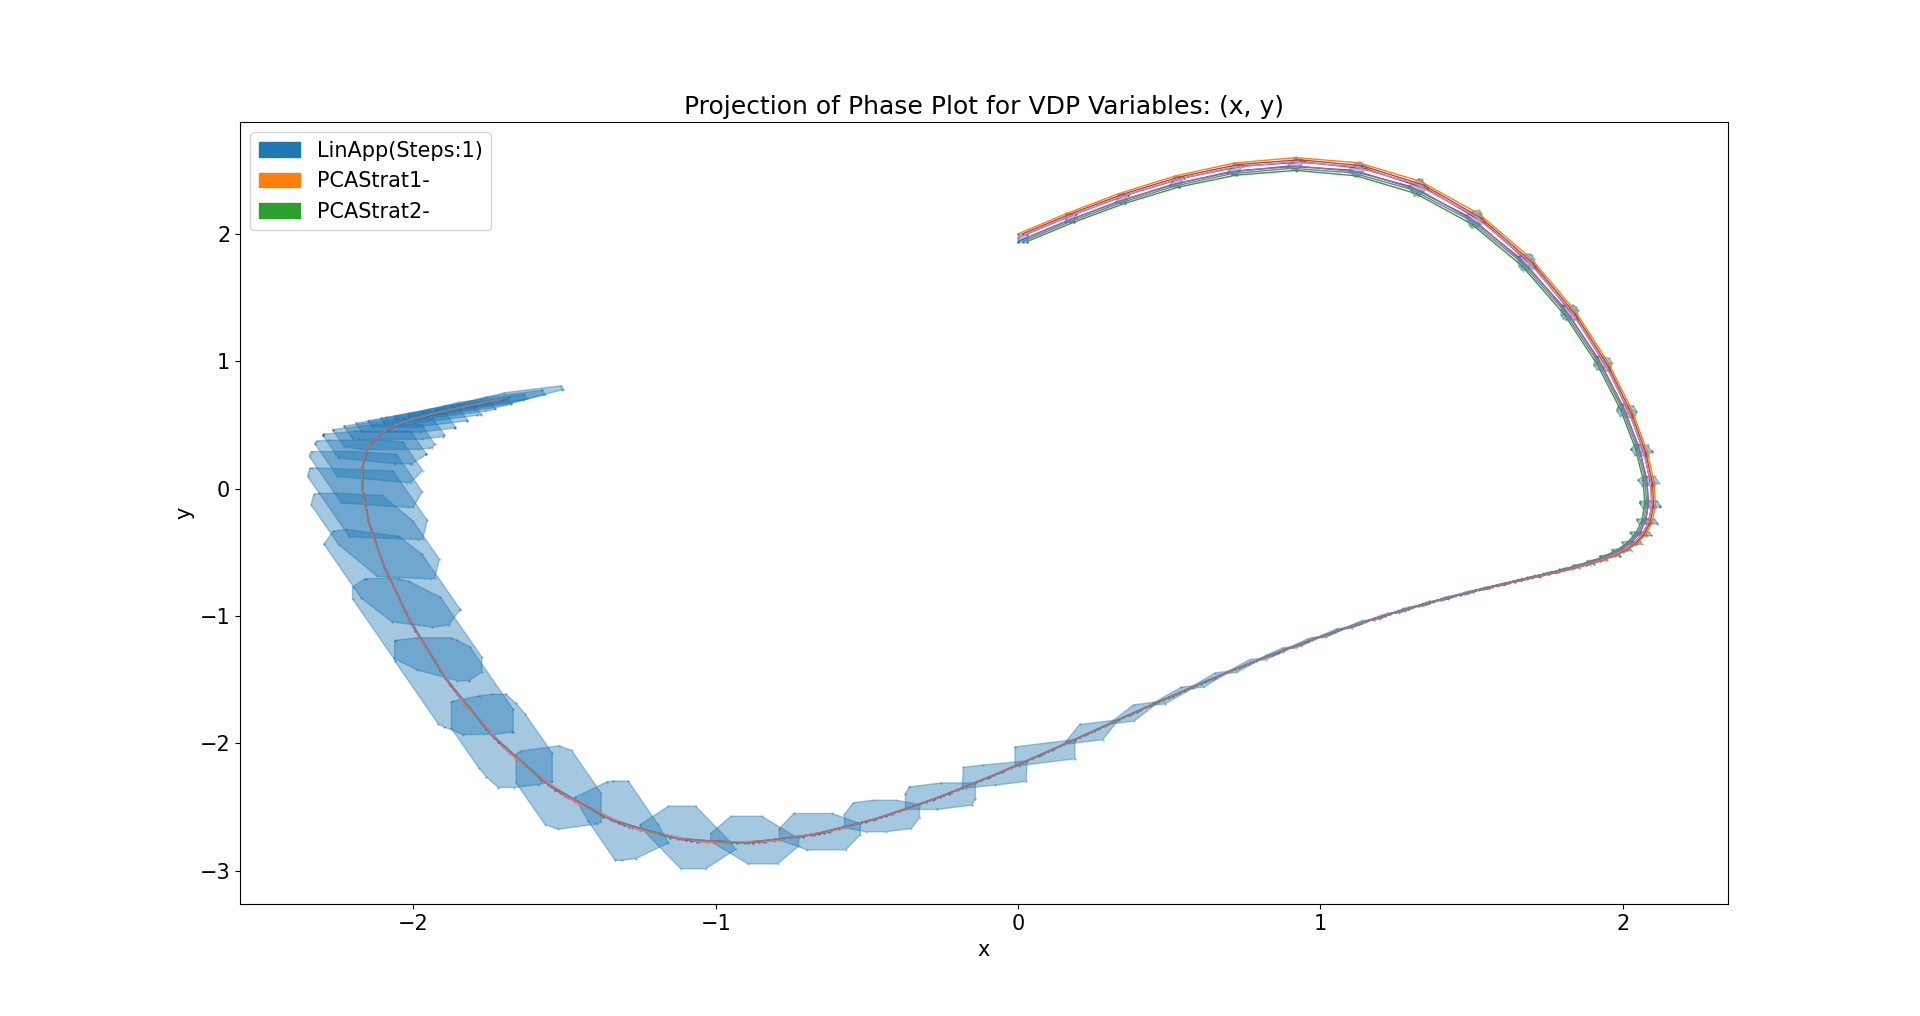

In [10]:
Image("figures/11:12:20/VDP(3x)(2PCA - 7 steps).png")

### Kaa's plot (3 PCA templates - 5 and 10 steps apart)

This will be 5 templates in all. The box template, the linear app template reorienting every step, and 3 PCA templates
One reorienting every step, one reorienting every 6 steps, and one reorienting every 11 steps. 

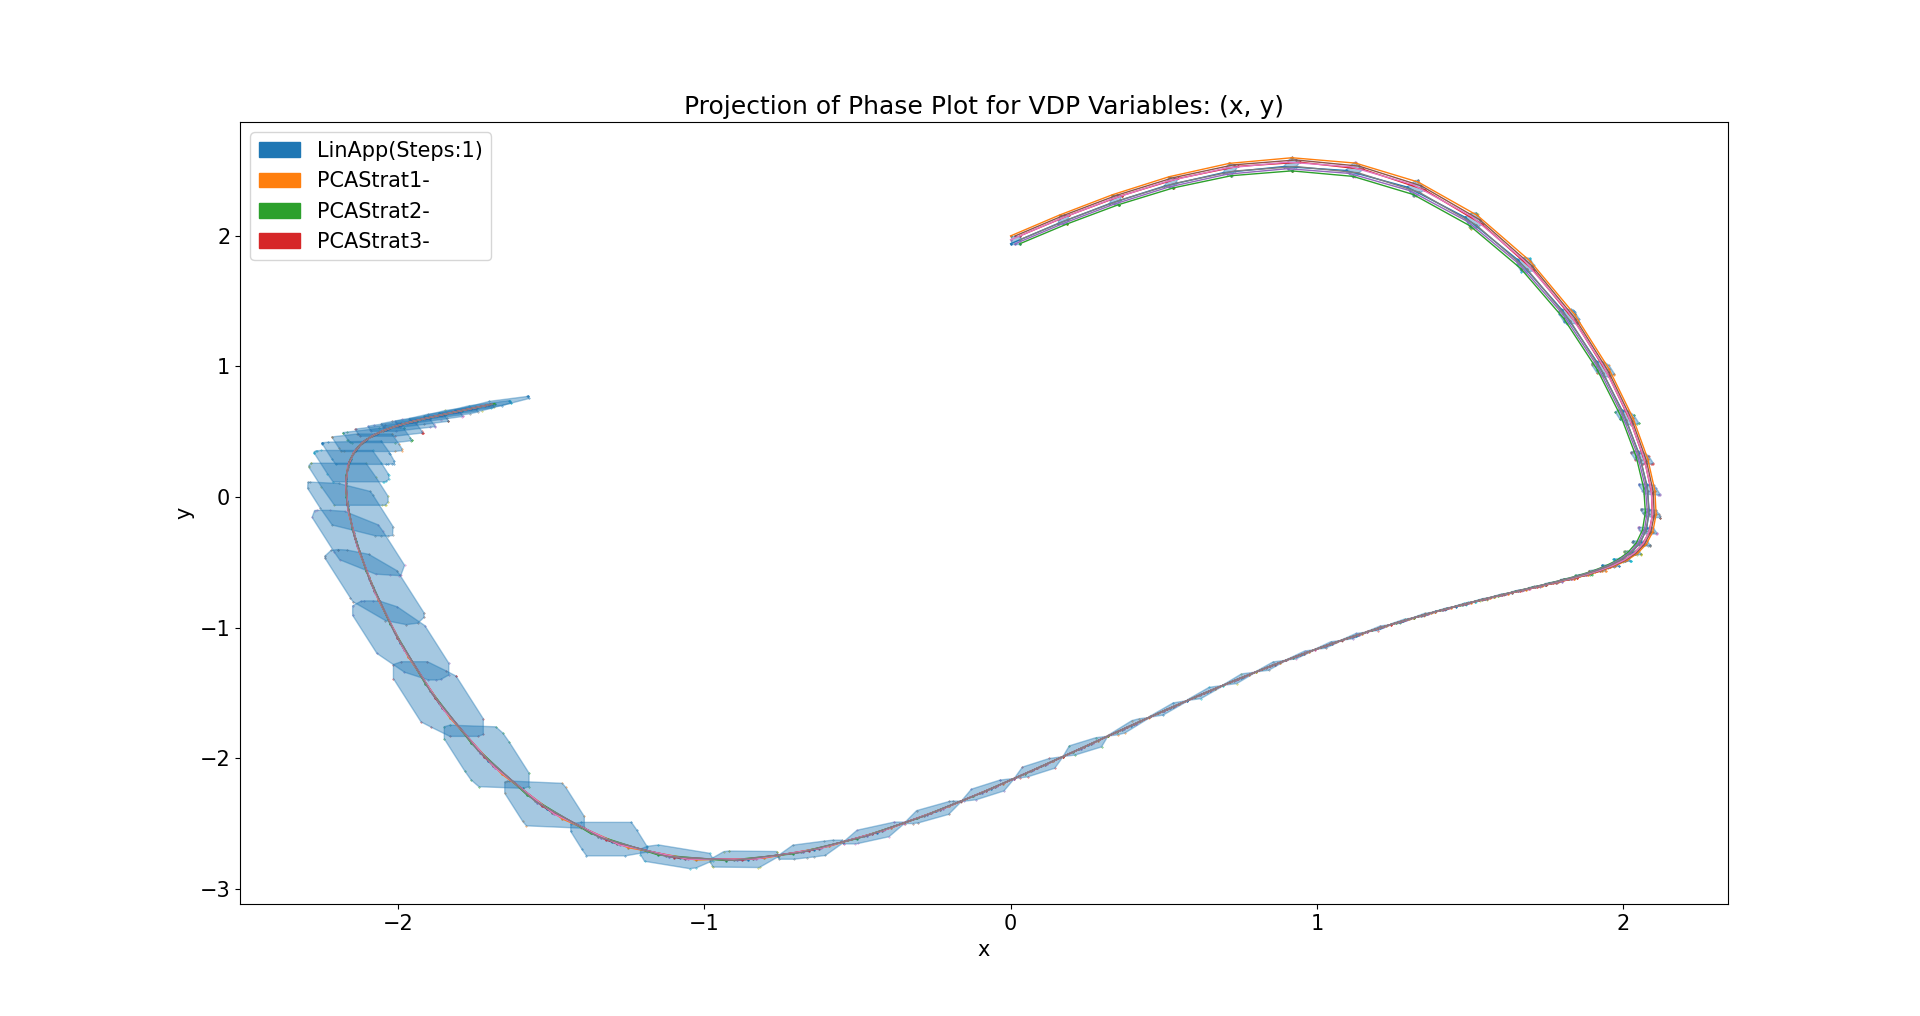

In [11]:
Image("figures/11:12:20/VDP(3x)(3PCA - 5 steps- 10 steps).png")